In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 5.2 MB/s 
     |████████████████████████████████| 18.0 MB 335 kB/s 
     |████████████████████████████████| 240 kB 67.4 MB/s 
     |████████████████████████████████| 198 kB 67.7 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 112 kB 65.1 MB/s 
     |████████████████████████████████| 1.6 MB 46.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 943 kB 28.3 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.1 MB/s 
     |████████████████████████████████| 4.0 MB 46.6 MB/s 
     |████████████████████████████████| 112 kB 57.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=d894465559

In [85]:
from qiskit import QuantumCircuit, execute, Aer, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.quantum_info.operators import Operator
from math import sqrt, pi

In [23]:
A10 = Operator([[1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)]])
A11 = Operator([[-1/sqrt(2),1/sqrt(2)],[1/sqrt(2),1/sqrt(2)]])

In [88]:
qc = QuantumCircuit(2) # 1量子ビットで量子回路を作成します。
qc.append(A10,[0])
qc.x(1)
custom = qc.to_gate().control()

qc2 = QuantumCircuit()
qr = QuantumRegister(3,'qreg')
qc2.add_register(qr)
for i in range(3):
    qc2.h(qr[i])
qc2.cz(qr[0],qr[1])
qc2.append(custom, [qr[2], qr[0], qr[1]])
qc2.h(qr[2])

cr = ClassicalRegister(1,'creg')
qc2.add_register(cr)
qc2.measure(qr[2],cr[0])
qc2.draw() # 回路を見てみましょう。

┌───┐   ┌───────────────┐        
qreg_0: ┤ H ├─■─┤0              ├────────
        ├───┤ │ │  circuit-1239 │        
qreg_1: ┤ H ├─■─┤1              ├────────
        ├───┤   └───────┬───────┘┌───┐┌─┐
qreg_2: ┤ H ├───────────■────────┤ H ├┤M├
        └───┘                    └───┘└╥┘
creg: 1/═══════════════════════════════╩═
                                       0

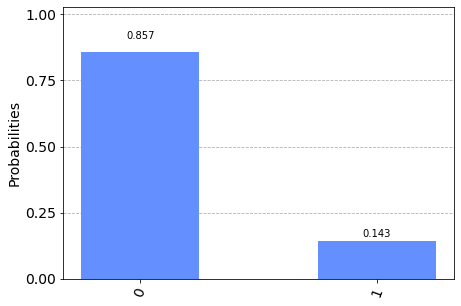

In [90]:
emulator = Aer.get_backend('qasm_simulator')

job = execute( qc2, emulator, shots=8192 )
hist = job.result().get_counts()
plot_histogram(hist)